In [1]:
import geopandas as gpd
import json

In [2]:
df = gpd.read_file('./AreasConpes/nuevas_areasPolygon.shp')
df = df.to_crs(crs=4326)
df = df.explode(index_parts=True)
df = df.reset_index()
df

/home/alejandro/anaconda3/lib/python3.7/site-packages/geopandas/geoseries.py:924: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if s.type.startswith("Multi") or s.type == "GeometryCollection":


,level_0,level_1,hectareas,nombre,observacio,fecha_act,fecha_lm,estado,id_ap,codigo,tipo,geometry
0,0,0,584076.436450,Sierra Nevada de Santa Marta,Reserva Temporal Res. 0320 2020,NaN,2020-03-31,Reserva_Temporal,02020026,0.0,Ampliacion,"POLYGON ((-73.89965 11.26021, -73.89928 11.260..."
1,0,1,584076.436450,Sierra Nevada de Santa Marta,Reserva Temporal Res. 0320 2020,NaN,2020-03-31,Reserva_Temporal,02020026,0.0,Ampliacion,"POLYGON ((-73.53095 11.22649, -73.53042 11.226..."
2,0,2,584076.436450,Sierra Nevada de Santa Marta,Reserva Temporal Res. 0320 2020,NaN,2020-03-31,Reserva_Temporal,02020026,0.0,Ampliacion,"POLYGON ((-73.42567 10.72471, -73.42516 10.724..."
3,1,0,176563.952455,Ecosistemas Secos del Patía,"Fase de aprestamiento, ruta de declaratoria in...",NaN,2021-07-08,Propuesta_Limite,NaN,0.0,Nueva_Area,"POLYGON ((-76.95024 2.26677, -76.95017 2.26677..."
4,2,0,76007.526026,Acandí Playón y Playona,Consulta Previa Finalizada,NaN,2022-07-15,Propuesta_Limite,02140001,0.0,Ampliacion,"POLYGON ((-77.11283 8.37959, -77.11283 8.37955..."
5,3,0,521269.292406,Serrania de San Lucas,Reserva Temporal Res. 0708 2021,NaN,2021-07-08,Reserva_Temporal,NaN,0.0,Nueva_Area,"POLYGON ((-74.30552 7.93149, -74.30549 7.93142..."
6,4,0,299937.504515,Selvas Transicionales de Cumaribo,Reserva Temporal de Recursos Naturales (resolu...,NaN,2021-07-08,Reserva_Temporal,NaN,0.0,Nueva_Area,"POLYGON ((-70.06517 4.18075, -70.05995 4.17857..."
7,5,0,68030.598228,Serranía de Manacacias,"Fase de aprestamiento, ruta de declaratoria in...",NaN,2020-12-02,Propuesta_Limite,NaN,0.0,Nueva_Area,"POLYGON ((-72.59769 3.60224, -72.59751 3.60195..."
8,6,0,308737.565253,Sabanas y humedales de Arauca,Reserva Temporal de Recursos Naturales (resolu...,NaN,2021-07-08,Reserva_Temporal,NaN,0.0,Nueva_Area,"POLYGON ((-70.47872 6.74630, -70.47874 6.74630..."


<AxesSubplot:>

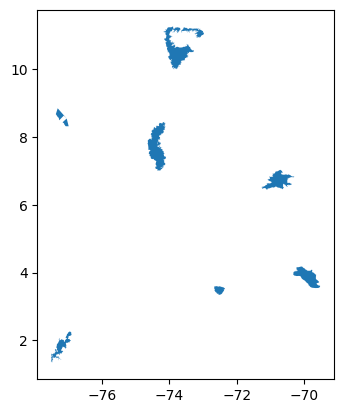

In [3]:
df.plot()

In [4]:

datajson = []
for i in range(0,len(df)):
    
    area = df["geometry"][i].exterior.coords
    arr = []
    
    # Takes one each 6 coordinates
    for j in range(0,len(area),6):
        arr.append(area[j][1])
        arr.append(area[j][0])
        arr.append(0)
        
    datajson.append(arr)


In [5]:
save_file3 = open("areasConpes.json", "w") 
json.dump(datajson, save_file3, indent = 6) 
save_file3.close() 